In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [5]:
(D_Train, Y_Train), (D_Test, Y_Test) = mnist.load_data()

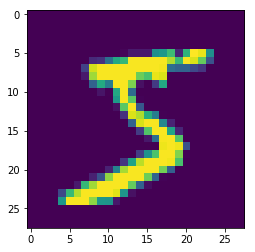

In [6]:
plt.imshow(D_Train[0])
plt.show()

In [7]:
print('D_Train shape : ', D_Train.shape)
print('Y_Train shape  : ', Y_Train.shape)

print('D_Test shape : ', D_Test.shape)
print('Y_Test shape  : ', Y_Test.shape)

D_Train shape :  (60000, 28, 28)
Y_Train shape  :  (60000,)
D_Test shape :  (10000, 28, 28)
Y_Test shape  :  (10000,)


In [8]:
d_train = D_Train.reshape(D_Train.shape[0], np.multiply(D_Train.shape[1], D_Train.shape[2]))
d_test = D_Test.reshape(D_Test.shape[0], np.multiply(D_Test.shape[1], D_Test.shape[2]))

In [9]:
print('d_train shape : ', d_train.shape)
print('d_test shape  : ', d_test.shape)

d_train shape :  (60000, 784)
d_test shape  :  (10000, 784)


In [10]:
y_train = to_categorical(Y_Train, 10)
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 10)


In [11]:
y_test = to_categorical(Y_Test, 10)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10000, 10)


In [12]:
class TerminateNaN(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs = {}):
        
        print("\n\nGet an blue print of self\n")
        print(dir(self))
        
        print("\n\nHere we are stop training after very first epoch i.e. 0\n")
        if epoch == 0:
            self.model.stop_training = True

In [13]:
terminate_nan = TerminateNaN()

In [14]:
model = Sequential()

In [15]:
from tensorflow.keras.initializers import glorot_normal

In [16]:
model.add(Dense(512, activation = 'sigmoid', input_shape = (784, ), kernel_initializer = glorot_normal(seed = 6)))
model.add(Dense(256, activation = 'sigmoid', kernel_initializer = glorot_normal(seed = 7)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = glorot_normal(seed = 8)))
model.add(Dense(10, activation = 'softmax', kernel_initializer = glorot_normal(seed = 9)))

In [17]:
optimizer = Adam(learning_rate = 0.05)

In [18]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [115]:
model.fit(x = d_train, y = y_train, epochs = 2, batch_size = 32, validation_split = 0.2, callbacks = [terminate_nan])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
47744/48000 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.9000
 Get an blue print of self

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_keras_api_names', '_keras_api_names_v1', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


Here we are stop training after ve